Initializing Various python packages using for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Header Files for Auto Regressive Integrated Moving Average (ARIMA) Model

In [11]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Header Files for Xtreme Gradient Boost (XGBoost) Model

In [13]:
import xgboost as xgb
from xgboost import plot_importance

Header Files for Long Short Term Memory (LSTM) Model


In [14]:
# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

from keras.utils import set_random_seed, plot_model

Header Files for Calculating RMSE and MAE

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

Importing Google Colab Drive connection code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def data_preprocessing(dataset):

  print("------------ DATA PREPROCESSING--------------")

  electric_power_consumption = pd.read_csv(dataset, sep=';',
                 parse_dates={'Date_Time' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])
  # Print info about the dataframe
  print(electric_power_consumption.info())

  print(".............................................")

  print("-------- First 4 rows of the data -----------")

  # Display the first few rows of the dataframe
  print(electric_power_consumption.head())

  print(".............................................")

  print("-------------- Missing values  --------------")

  # Check for missing values
  print(electric_power_consumption.isnull().sum())

  # Fill missing values with column means
  electric_power_consumption.fillna(electric_power_consumption.mean(), inplace=True)

  # Set the index to the datetime column
  electric_power_consumption.set_index('Date_Time', inplace=True)

  # Resample the data into hourly intervals and aggregate using mean
  newdf = electric_power_consumption.resample('H').mean()

  print(".............................................")

  print("------------ No missing values  -------------")

  # Check for missing values after resampling
  print(newdf.isnull().sum())

  print(".............................................")

  newdf.describe()

  return newdf

In [8]:
def ed_analysis(dataset):
  newdf = dataset
  # Create new columns for year, quarter, month, and day
  newdf['year'] = newdf.index.year
  newdf['quarter'] = newdf.index.quarter
  newdf['month'] = newdf.index.month
  newdf['day'] = newdf.index.day
  newdf['weekday'] = (newdf.index.weekday < 5).astype(int)

  '''

  '''

  print("Boxplot for the feature 'Global Active Power")

  print("*********************************")

  # Plot boxplots for each feature
  data1=newdf.loc[:,['Global_active_power']]
  plt.figure(figsize=(10, 7))
  data1.boxplot()
  plt.title('Boxplots for Global Active Power (in kW)')
  #plt.xticks(rotation=45)
  plt.show()

  print ("Active Power Consumption for a Particular Time Frame")

  dataset_one_month = newdf[(newdf.index.year == 2010) &
                           (newdf.index.month == 11)]

  plt.figure(figsize=(14,6))
  plt.plot(dataset_one_month.index, dataset_one_month['Global_active_power'], color='#ff6361')
  plt.ylabel('Global Active Power (kW)', fontsize=14)
  plt.xlabel('Date', fontsize=14)
  plt.title('Active Power Consumption for a Particular Time Frame', fontsize=16, fontweight='bold')
  plt.tight_layout()
  plt.grid(True)
  sns.despine(bottom=True, left=True)
  plt.show()

  '''

  '''
  print("*********************************")

  print("Bar plots for Yearly and Quaterly Global Active Power")

  # Create a figure with 2 subplots
  plt.figure(figsize=(14,5))

  # Plot the first subplot showing the bar graph of yearly global active power
  plt.subplot(1,2,1)
  # Adjust the subplot's width
  plt.subplots_adjust(wspace=0.2)
  # Create the bar graph using Seaborn's barplot function
  sns.barplot(x="year", y="Global_active_power", data=newdf, color='purple')
  # Label the x-axis
  plt.xlabel('Year', fontsize=12)
  # Add a title to the plot
  plt.title('Bar plot of Yearly Global Active Power', fontsize=14)
  # Remove the top and right spines of the plot
  sns.despine(left=True, bottom=True)
  # Add a tight layout to the plot
  plt.tight_layout()

  # Plot the second subplot showing the bar graph of quarterly global active power
  plt.subplot(1,2,2)
  # Create the bar graph using Seaborn's barplot function
  sns.barplot(x="quarter", y="Global_active_power", data=newdf, color='purple')
  # Label the x-axis
  plt.xlabel('Quarter', fontsize=12)
  # Add a title to the plot
  plt.title('Bar plot of Quarterly Global Active Power', fontsize=14)
  # Remove the top and right spines of the plot
  sns.despine(left=True, bottom=True)
  # Add a tight layout to the plot
  plt.tight_layout()


  '''

  '''
  print("*********************************")

  print("Subplots of Global Active Power Consumption (in kW) over Time")


  # Create a figure with specified size
  fig = plt.figure(figsize=(25, 15))
  # Adjust the subplot spacing
  fig.subplots_adjust(hspace=1)

  # Create first subplot
  ax1 = fig.add_subplot(5, 1, 1)
  # Plot the resampled mean of Global_active_power over day with different color
  ax1.plot(newdf['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
  # Set the title for the subplot
  ax1.set_title('Mean Global active power resampled over day', fontsize=14, fontweight='bold')
  # Set major tick parameters for the subplot
  ax1.tick_params(axis='both', which='major')
  # Set x-axis label
  ax1.set_xlabel('Days', fontsize=12)
  # Set y-axis label
  ax1.set_ylabel('Global Active Power', fontsize=12)

  # Create second subplot
  ax2 = fig.add_subplot(5, 1, 2, sharex=ax1)
  # Plot the resampled mean of Global_active_power over week with different color
  ax2.plot(newdf['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
  # Set the title for the subplot
  ax2.set_title('Mean Global active power resampled over week', fontsize=14, fontweight='bold')
  # Set major tick parameters for the subplot
  ax2.tick_params(axis='both', which='major')
  # Set x-axis label
  ax2.set_xlabel('Week', fontsize=12)
  # Set y-axis label
  ax2.set_ylabel('Global Active Power', fontsize=12)

  # Create third subplot
  ax3 = fig.add_subplot(5, 1, 3, sharex=ax1)
  # Plot the resampled mean of Global_active_power over month with different color
  ax3.plot(newdf['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
  # Set the title for the subplot
  ax3.set_title('Mean Global active power resampled over month', fontsize=14, fontweight='bold')
  # Set major tick parameters for the subplot
  ax3.tick_params(axis='both', which='major')
  # Set x-axis label
  ax3.set_xlabel('Month', fontsize=12)
  # Set y-axis label
  ax3.set_ylabel('Global Active Power', fontsize=12)

  # Create fourth subplot
  ax4 = fig.add_subplot(5, 1, 4, sharex=ax1)
  # Plot the resampled mean of Global_active_power over quarter with different color
  ax4.plot(newdf['Global_active_power'].resample('Q').mean(), linewidth=1, color='purple')
  # Set the title for the subplot
  ax4.set_title('Mean Global active power resampled over quarter', fontsize=14, fontweight='bold')
  # Set major tick parameters for the subplot
  ax4.tick_params(axis='both', which='major')
  # Set x-axis label
  ax4.set_xlabel('Quarter', fontsize=12)
  # Set y-axis label
  ax4.set_ylabel('Global Active Power', fontsize=12)

  # Create fifth subplot
  ax5 = fig.add_subplot(5, 1, 5, sharex=ax1)
  # Plot the resampled mean of Global_active_power over year with different color
  ax5.plot(newdf['Global_active_power'].resample('A').mean(), linewidth=1, color='purple')
  # Set the title for the subplot
  ax5.set_title('Mean Global active power resampled over year', fontsize=14, fontweight='bold')
  # Set major tick parameters for the subplot
  ax5.tick_params(axis='both', which='major')
  # Set x-axis label
  ax5.set_xlabel('Year', fontsize=12)
  # Set y-axis label
  ax5.set_ylabel('Global Active Power', fontsize=12)

  plt.show()

  '''
  '''

  print("*********************************")
  print("Subplots of Average Global Active Power Consumption (in kW) over Time")

  # Create a figure with 2 rows and 2 columns and set its size to 14x8
  plt.figure(figsize=(15, 10))

  # First subplot in the first row, first column
  plt.subplot(2, 2, 1)
  # Group data by year and take the mean of the 'Global_active_power' column
  grouped_by_year = newdf.groupby(newdf.index.year).Global_active_power.agg('mean')
  # Plot the mean of 'Global_active_power' by year with purple color
  grouped_by_year.plot(color='purple')
  # Set the x label to be empty
  plt.xlabel('')
  # Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
  plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

  # Second subplot in the first row, second column
  plt.subplot(2, 2, 2)
  # Group data by quarter and take the mean of the 'Global_active_power' column
  grouped_by_quarter = newdf.groupby(newdf.index.quarter).Global_active_power.agg('mean')
  # Plot the mean of 'Global_active_power' by quarter with purple color
  grouped_by_quarter.plot(color='purple')
  # Set the x label to be empty
  plt.xlabel('')
  # Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
  plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

  # Third subplot in the second row, first column
  plt.subplot(2, 2, 3)
  # Group data by month and take the mean of the 'Global_active_power' column
  grouped_by_month = newdf.groupby(newdf.index.month).Global_active_power.agg('mean')
  # Plot the mean of 'Global_active_power' by month with purple color
  grouped_by_month.plot(color='purple')
  # Set the x label to be empty
  plt.xlabel('')
  # Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
  plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

  # Fourth subplot in the second row, second column
  plt.subplot(2, 2, 4)
  # Group data by day and take the mean of the 'Global_active_power' column
  grouped_by_day = newdf.groupby(newdf.index.day).Global_active_power.agg('mean')
  # Plot the mean of 'Global_active_power' by day with purple color
  grouped_by_day.plot(color='purple')
  # Set the x label to be empty
  plt.xlabel('')
  # Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
  plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

  # Use tight_layout to adjust the subplots so that they fit into the figure area
  plt.tight_layout()

  # Show the plot
  plt.show()


Code for ARIMA model

In [27]:
def arima_initialize(data):
  newdf = data
  data1 = newdf.loc[:,['Global_active_power']]
  #variable plot is set so that column Global active power will be executed.

  '''

  "Plots for Auto Correlation and Partial Auto Correlation"

  '''

  print("*********************************")

  print("Auto Regressive Integreted Moving Average (ARIMA) Model")

  plot = data1['Global_active_power']

  acf_original = plot_acf(plot)
  pacf_original = plot_pacf(plot)

  print("*********************************")

  print("Augmented Dickey Fuller Test ")

  print("*********************************")


  def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF:", dftest[0])
    print("2. P-value:", dftest[1])
    print("3. Num of lags:", dftest[2])
    print("4. Num of observations used for ADF regression and critical values calculation:", dftest[3])
    print("5. Critical values: ")
    for key, val in dftest[4].items():
      print("\t", key, ":", val)

  ad_test(data1['Global_active_power'])

  '''
  Splitting data into Training and test data, where training data contains 90
  % while test data contains the remaining data.
  '''
  print("*********************************")

  print("Shapes of Train and Test Data ")

  print("*********************************")

  train_size = int(len(data1) * 0.9)
  train, test = data1[:train_size], data1[train_size:]
  print(train.shape, test.shape)

  print("*********************************")

  return train, test, data1


In [26]:
def arima_fit(train, test):


   print(".............................................")
   p_values=range(0,5)
   d_values=range(0,2)
   q_values=range(0,5)
   for p in p_values:
     for d in d_values:
       for q in q_values:
         order = (p, d, q)
         predictions = []
         try:
           model = ARIMA(train, order=order)
           model_fit = model.fit()
           y_pred = model_fit.forecast(steps=len(test))[0]
           predictions.extend(y_pred)
           error = mean_squared_error(test, predictions)
           print("ARIMA%s RMSE = %.2f" % (order, error))
           if error < best_rmse:
             best_rmse = error
             best_params = order
         except:
           continue
   arima_model_order = model_fit.summary()
   print("*********************************")
   print(arima_model_order)
   n_periods = int(len(test))  # Number of periods to predict (10% of test data)
   predictions = model_fit.predict(n_periods=n_periods)

   # Slice the predictions array to only include the last n_periods
   sliced_predictions = predictions[-n_periods:]

   # Assuming 'test' is your actual test dataset and 'predictions' are the predictions from the ARIMA model
   # Calculate RMSE


   rmse = sqrt(mean_squared_error(test, sliced_predictions))
   # Calculate MAE
   mae = mean_absolute_error(test, sliced_predictions)

   print("*********************************")

   print("Root Mean Squared Error and Mean Absolute Error of the data. ")

   print("*********************************")

   print(f'RMSE: {rmse}')
   print(f'MAE: {mae}')

   return test, sliced_predictions, arima_model_order

Code for XGBoost Model

In [22]:
def xgboost_initialize(data):
  """

  Returns:

  """
  print("*********************************")

  print("XGBoost Model")

  print("*********************************")

  def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    data.drop(col, axis=1, inplace = True)
    return data

  # Set 15 minutes as a lagging time unit, therefore lagging time will be 15 min * n, such as 15 min, 30 min, 1 hour and so on.
  # The smaller this lagging time unit is, the better the predicting result is.

  def get_lag(data, col, lagtime):
    for i in range(1,lagtime + 1):
      if len(pd.Series(col)) == 1:
        data[col+"_lag"+str(i)] = data[col].shift(i*15)
      else:
        for col_j in col:
          data[col_j+"_lag"+str(i)] = data[col_j].shift(i*15)
    return data


  # Create Time Series Features
  data['date'] = data.index
  data['hour'] = data['date'].dt.hour
  data = encode(data,'hour',24)
  data['dayofweek'] = data['date'].dt.dayofweek
  data = encode(data,'dayofweek',7)
  data['month'] = data['date'].dt.month
  data = encode(data,'month',12)
  # newdf['year'] = newdf['date'].dt.year
  data['dayofyear'] = data['date'].dt.dayofyear
  data = encode(data,'dayofyear',365)
  data['dayofmonth'] = data['date'].dt.day
  data = encode(data,'dayofmonth',31)
  #newdf['weekofyear'] = newdf['date'].dt.weekofyear
  data.drop('date',axis=1,inplace = True)

  # adding lagging feature
  # adding time lags of 15min,30min as features
  lagtime = 2
  lag_feature = ['Global_reactive_power','Voltage', 'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
  newdf = get_lag(data, lag_feature, lagtime)

  # adding time lags of 2 hours as features
  data = get_lag(data, 'Global_active_power', 8)
  data.drop(lag_feature,axis=1,inplace = True)
  data.dropna(inplace=True)

  split_date =pd.to_datetime('2010-07-05')
  df_train = data.loc[data.index <= split_date].copy()
  df_train.shape

  train_size = int(len(data) * 0.9)
  train, test = newdf[:train_size], newdf[train_size:]
  #print(train.shape, test.shape)

  # The target is forecasting Global_active_power.
  X_train, y_train = train.iloc[:,1:],train.iloc[:,0]
  X_test, y_test = test.iloc[:,1:],test.iloc[:,0]

  print("*********************************")

  return X_train, y_train, X_test, y_test, train, test

In [56]:
def xgboost_fit(data):

  X_train, y_train, X_test, y_test, train, test = xgboost_initialize(power_consumption)

  print("*********************************")

  reg = xgb.XGBRegressor(n_estimators=1000)
  reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50, verbose=False) # Change verbose to True if you want to see it train

  print("*********************************")

  test['Prediction'] = reg.predict(X_test)
  df_all = pd.concat([test, train], sort=False)

  print("*********************************")

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(test['Global_active_power'], test['Prediction']))

  # Calculate MAE
  mae = mean_absolute_error(test['Global_active_power'], test['Prediction'])

  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Absolute Error (MAE):", mae)

  actual_plot = test['Global_active_power']
  prediction_plot = test['Prediction']

  return reg, actual_plot, prediction_plot

  print("*********************************")

Code for LSTM

In [37]:
def lstm_initialize(newdf):
  print("*********************************")

  print("Long Short Term Memory (LSTM).")

  print("*********************************")

  data1 = newdf.loc[:,['Global_active_power']]
  # Filter data for the year 2010
  #filtered_one_day_data = data1
  #Transform the Global_active_power column of the data DataFrame into a numpy array of float values

  dataset = data1.Global_active_power.values.astype('float32')
  #Reshape the numpy array into a 2D array with 1 column

  dataset = np.reshape(dataset, (-1, 1))
  #Create an instance of the MinMaxScaler class to scale the values between 0 and 1
  scaler = MinMaxScaler(feature_range=(0, 1))

  #Fit the MinMaxScaler to the transformed data and transform the values

  dataset = scaler.fit_transform(dataset)

  #Split the transformed data into a training set (90%) and a test set (10%)
  train_size = int(len(dataset) * 0.90)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

  # reshape into X=t and Y=t+1
  look_back = 30
  X_train, Y_train = create_dataset(train, look_back)
  X_test, Y_test = create_dataset(test, look_back)

  # reshape input to be [samples, time steps, features]
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

  return scaler, X_train, Y_train, X_test, Y_test



In [65]:
def lstm_fit(data):
  scaler, X_train, Y_train, X_test, Y_test = lstm_initialize(data)
  # Defining the LSTM model
  model = Sequential()
  # Adding the first layer with 100 LSTM units and input shape of the data
  model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
  # Adding a dropout layer to avoid overfitting
  model.add(Dropout(0.2))
  # Adding a dense layer with 1 unit to make predictions
  model.add(Dense(1))
  # Compiling the model with mean squared error as the loss function and using Adam optimizer
  model.compile(loss='mean_squared_error', optimizer='adam')

  # Plot the model
  plot = plot_model(model, to_file='lstm_model.png')

  print(" Model training with 50 epochs.")

  print("*********************************")

  # Fitting the model on training data and using early stopping to avoid overfitting
  history = model.fit(X_train, Y_train, epochs=50, batch_size=1240,
                        validation_data=(X_test, Y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
                        verbose=1, shuffle=False)
  # Displaying a summary of the model
  print("Summary of the model. ")

  print("*********************************")
  model.summary()

  # make predictions
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  print("Prediction using test data ")

  print("*********************************")

  # invert predictions
  test_predict = scaler.inverse_transform(test_predict)
  Y_test = scaler.inverse_transform([Y_test])

  print('Root Mean Squared Error (RMSE):',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
  print('Mean Absolute Error (MAE):', mean_absolute_error(Y_test[0], test_predict[:,0]))

  print("*********************************")

  return plot, Y_test, test_predict, history



Visualization of each models

In [66]:
def visualization(test_set, sliced_predictions, actual_plot, prediction_plot, history, Y_test, test_predict):


  def plot_arima(test_set, sliced_predictions):
    print ("ARIMA Model test data plot of Actual vs Predicted")
    # Plot actual vs. predicted values
    plt.figure(figsize=(20, 6))
    plt.plot(test_set.index, test_set['Global_active_power'] , color='blue' ,label='Actual')
    plt.plot(test_set.index, sliced_predictions, color='red', label='Predicted')
    plt.title('Actual vs. Predicted Global Active Power')
    plt.xlabel('Date')
    plt.ylabel('Global Active Power')
    plt.legend()
    plt.show()


  def plot_xgboost(actual_plot, prediction_plot):
    print ("XGBoost Model test data plot of Actual vs Predicted")
    plt.figure(figsize=(20, 6))
    plt.plot(actual_plot.index, actual_plot, color='blue', label='Actual')
    plt.plot(actual_plot.index, prediction_plot, color='red', label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Global Active Power')
    plt.title('Actual vs Predicted Global Active Power')
    plt.legend()
    plt.show()



  def plot_lstm(history, Y_test, test_predict):
    print ("LSTM Model loss plot")

    '''
    Graph for model loss.
    '''


    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    #plt.xticks(range(0,21))
    plt.legend(loc='upper right')
    plt.show()


    '''
    Graph of Actual vs Predicted using Test data
    '''

    print ("LSTM Model test data plot of Actual vs Predicted")

    aa=[x for x in range(len(Y_test[0]))]

    # Creating a figure object with desired figure size
    plt.figure(figsize=(20,6))

    plt.title("Actual vs Predicted Global Active Power")

    # Plotting the actual values in purple with a dot marker
    plt.plot(aa, Y_test[0], marker='.', label="actual", color='blue')

    # Plotting the predicted values in red with a solid line
    plt.plot(aa, test_predict[:, 0], '-', label="prediction", color='red')

    # Removing the top spines
    sns.despine(top=True)

    # Adjusting the subplot location
    plt.subplots_adjust(left=0.07)

    # Labeling the y-axis
    plt.ylabel('Global_active_power', size=14)

    # Labeling the x-axis
    plt.xlabel('Time step', size=14)

    # Adding a legend with font size of 15
    plt.legend(fontsize=16)

    # Display the plot
    plt.show()


  plot_arima(test_set, sliced_predictions)
  plot_xgboost(actual_plot, prediction_plot)
  plot_lstm(history, Y_test, test_predict)





Calling Various Functions

In [59]:
power_consumption = data_preprocessing('/content/drive/MyDrive/household_power_consumption.txt')

------------ DATA PREPROCESSING--------------


<ipython-input-3-dc314e44b002>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  electric_power_consumption = pd.read_csv(dataset, sep=';',
<ipython-input-3-dc314e44b002>:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  electric_power_consumption = pd.read_csv(dataset, sep=';',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None
.............................................
-------- First 4 rows of the data -----------
            Date_Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498 

Boxplot for the feature 'Global Active Power
*********************************


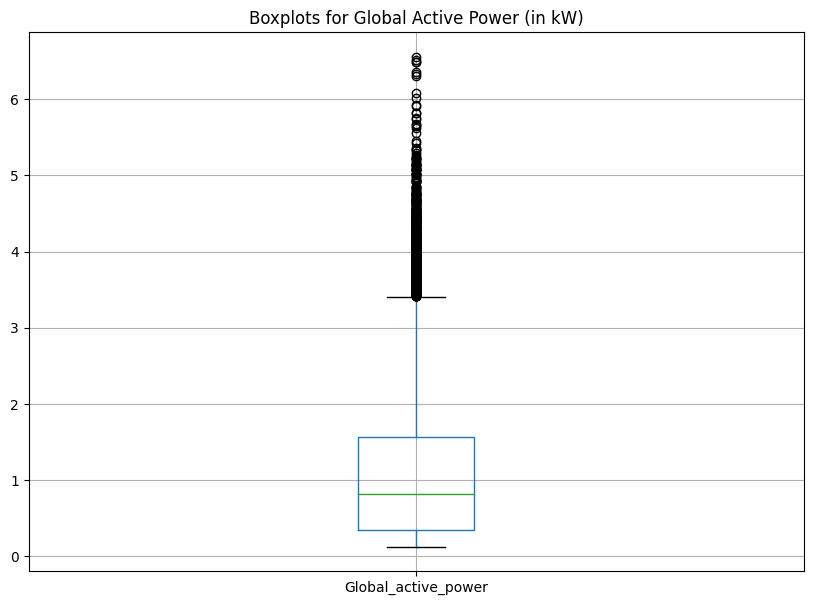

Active Power Consumption for a Particular Time Frame


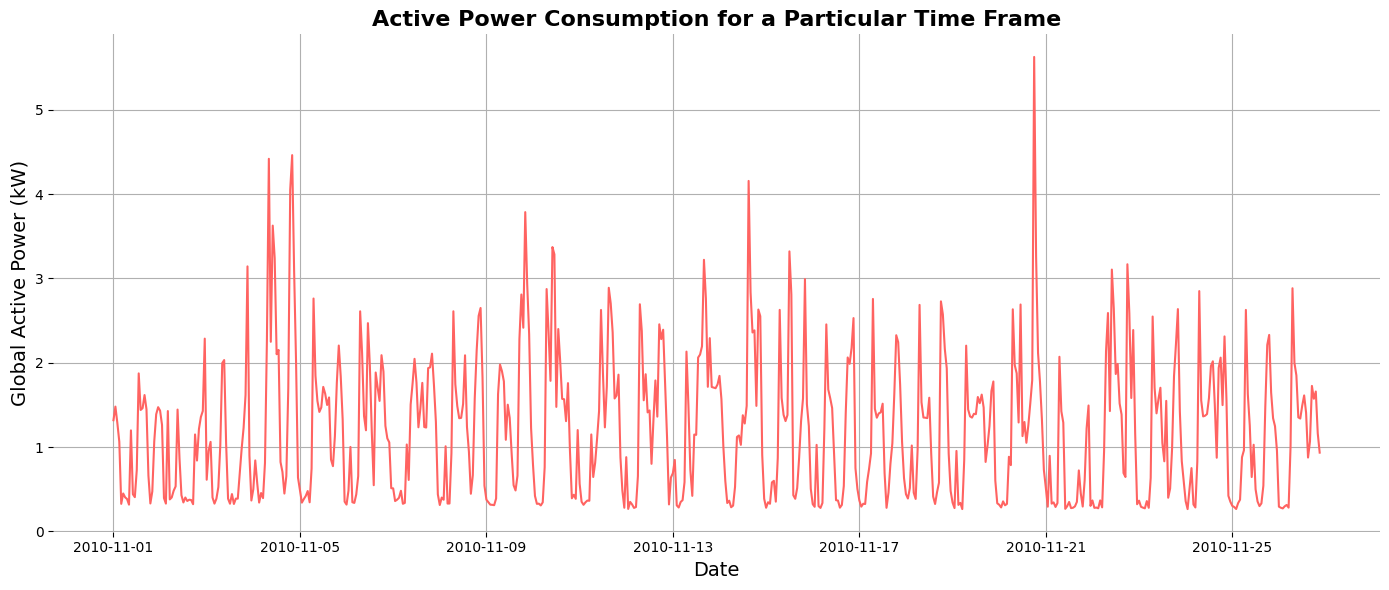

*********************************
Bar plots for Yearly and Quaterly Global Active Power
*********************************
Subplots of Global Active Power Consumption (in kW) over Time


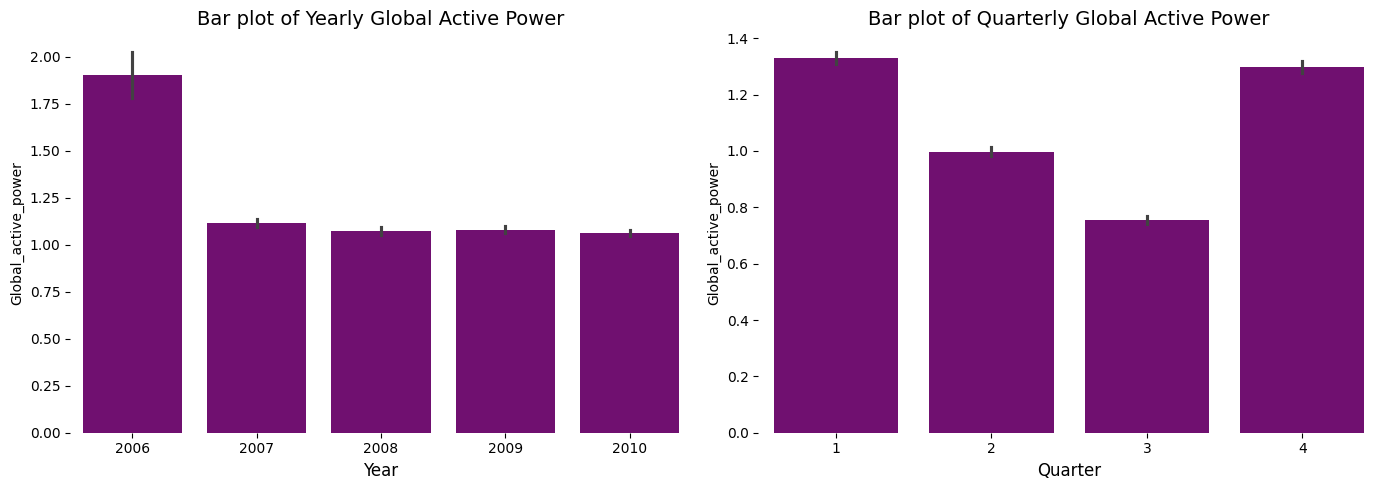

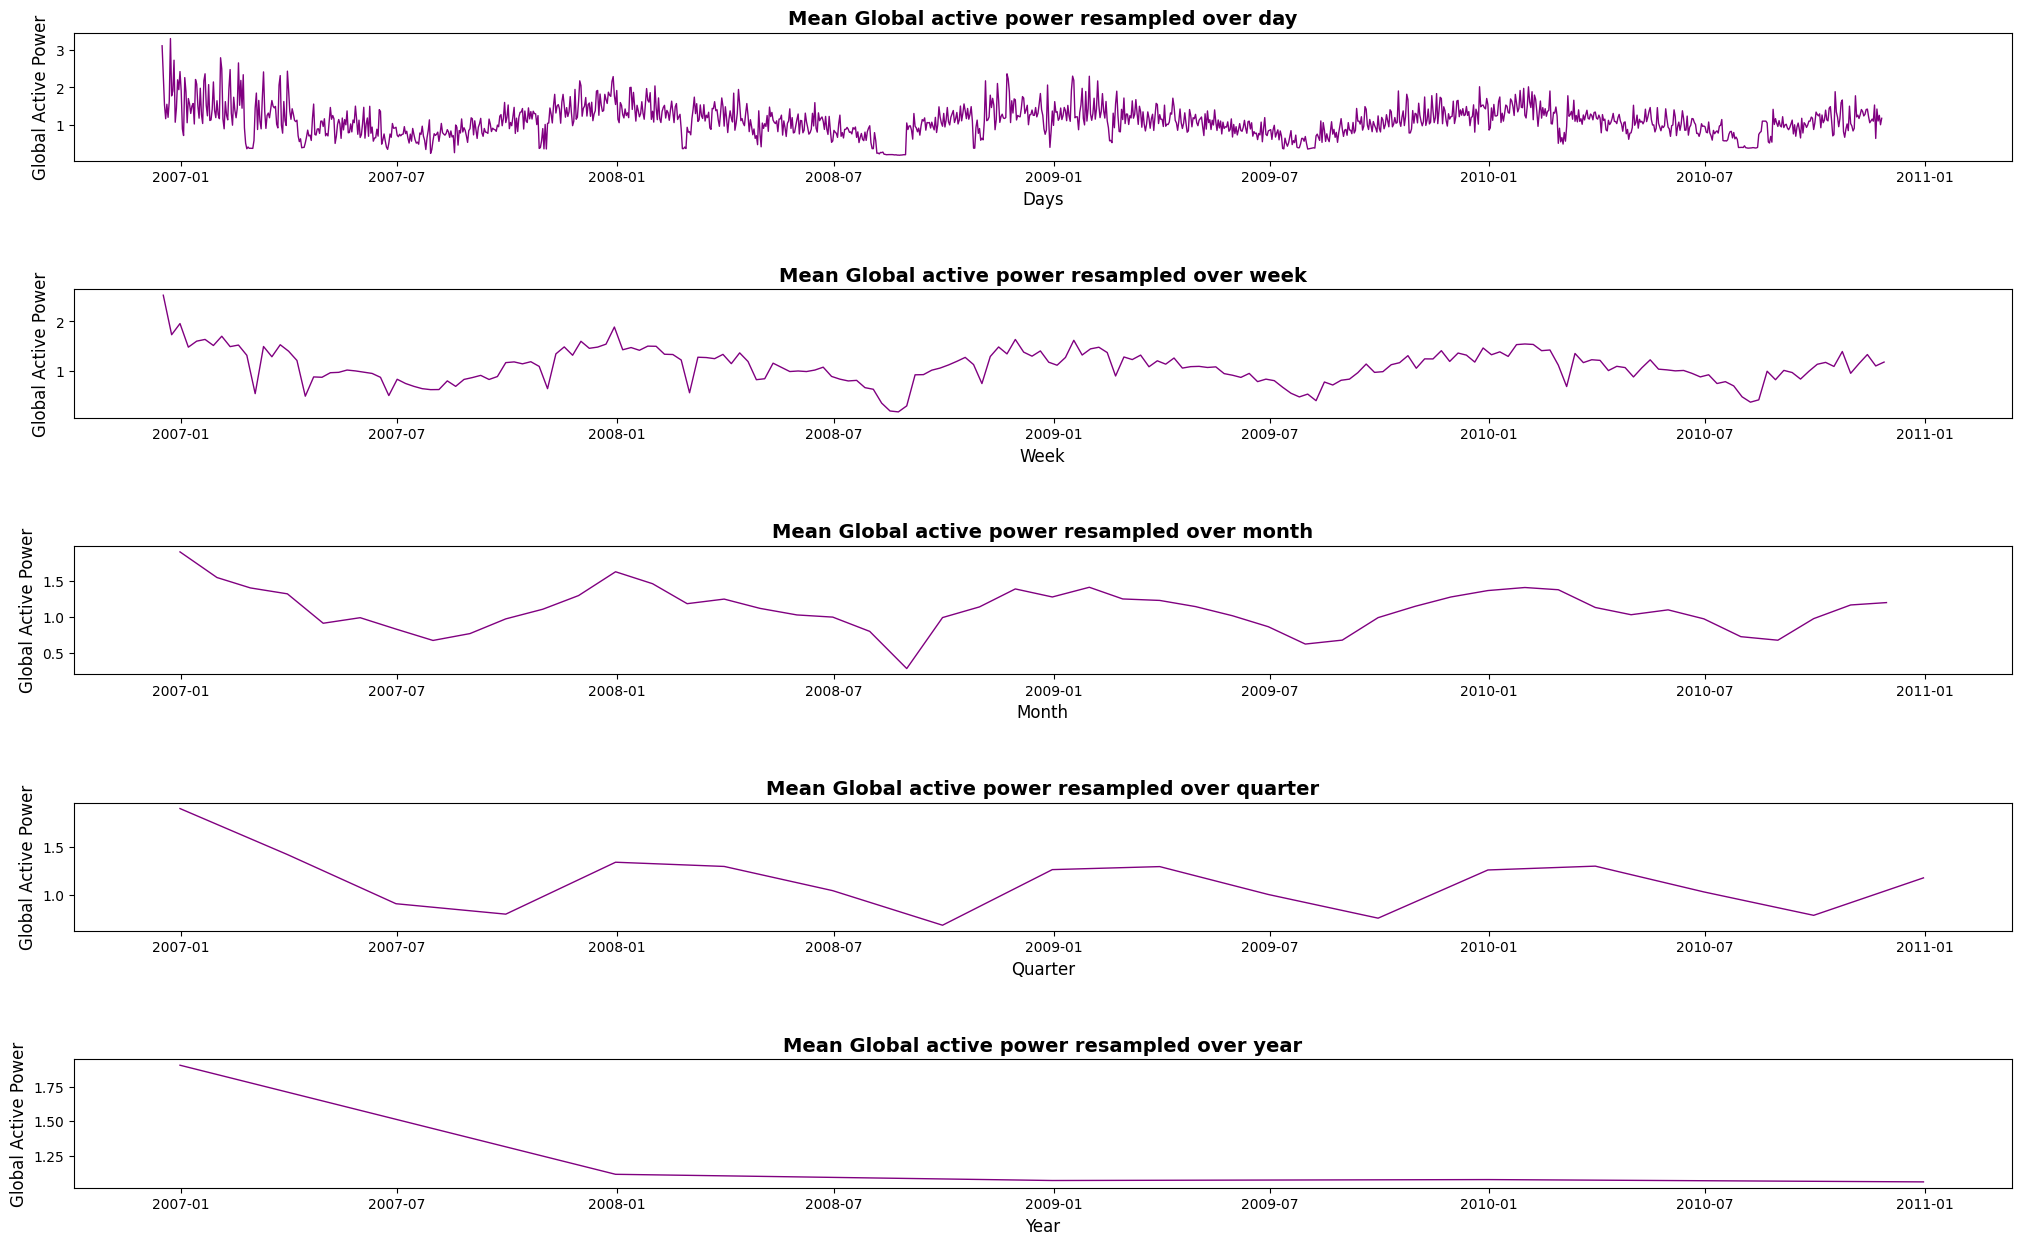

*********************************
Subplots of Average Global Active Power Consumption (in kW) over Time


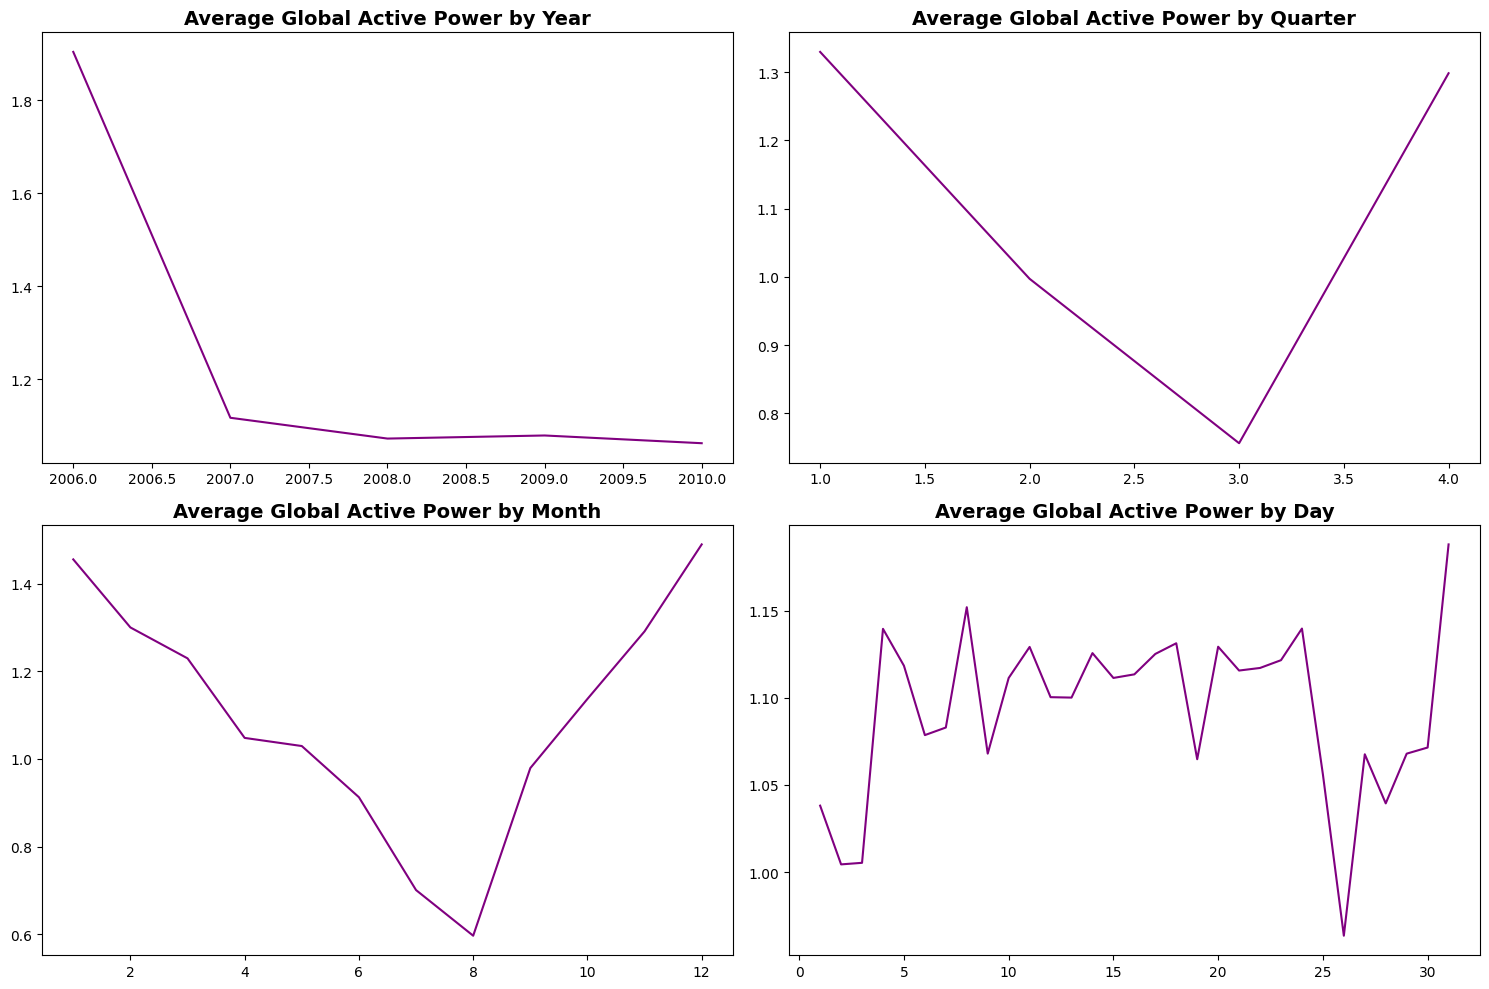

In [9]:
# Perform exploratory data analysis
ed_analysis(power_consumption)

*********************************
Auto Regressive Integreted Moving Average (ARIMA) Model
*********************************
Augmented Dickey Fuller Test 
*********************************
1. ADF: -14.544741029513602
2. P-value: 5.0783072426536266e-27
3. Num of lags: 51
4. Num of observations used for ADF regression and critical values calculation: 34417
5. Critical values: 
	 1% : -3.4305400162068493
	 5% : -2.8616239824230587
	 10% : -2.566814701212094
*********************************
Shapes of Train and Test Data 
*********************************
(31022, 1) (3447, 1)
*********************************


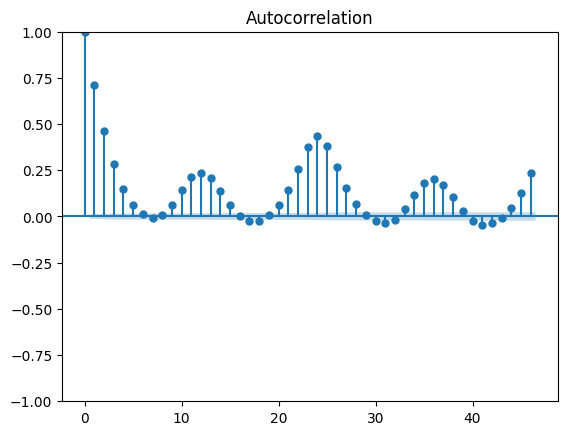

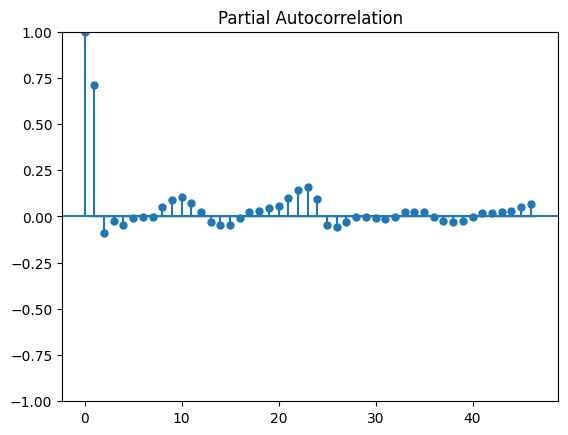

In [39]:
train_data, test_data, data1 = arima_initialize(power_consumption)

In [41]:
# Step 2: Fit ARIMA model using the training data and evaluate its performance
test_set, sliced_predictions, arima_model_order = arima_fit(train_data, test_data)

.............................................


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/sta

*********************************
                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                31022
Model:                  ARIMA(4, 1, 4)   Log Likelihood              -29369.753
Date:                 Wed, 24 Apr 2024   AIC                          58757.506
Time:                         15:40:49   BIC                          58832.588
Sample:                     12-21-2006   HQIC                         58781.559
                          - 07-06-2010                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0687      0.039     -1.768      0.077      -0.145       0.007
ar.L2          0.5627      0.037     15.152      0.000       0.490       0.635
ar.L3     

XGBoost

In [60]:
reg, actual_plot, prediction_plot = xgboost_fit(power_consumption)

*********************************
XGBoost Model
*********************************
*********************************
*********************************


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


*********************************
*********************************
Root Mean Squared Error (RMSE): 0.5819740456286109
Mean Absolute Error (MAE): 0.4372154366987499


<ipython-input-56-3ad8e0c1fe8e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = reg.predict(X_test)


In [54]:
plot, Y_test, test_predict, history = lstm_fit(power_consumption)

*********************************
Long Short Term Memory (LSTM).
*********************************
 Model training with 50 epochs.
*********************************
Epoch 1/50
25/25 [==============================] - 3s 40ms/step - loss: 0.0223 - val_loss: 0.0096
Epoch 2/50
25/25 [==============================] - 1s 30ms/step - loss: 0.0144 - val_loss: 0.0079
Epoch 3/50
25/25 [==============================] - 1s 31ms/step - loss: 0.0124 - val_loss: 0.0071
Epoch 4/50
25/25 [==============================] - 1s 32ms/step - loss: 0.0113 - val_loss: 0.0067
Epoch 5/50
25/25 [==============================] - 1s 32ms/step - loss: 0.0107 - val_loss: 0.0064
Epoch 6/50
25/25 [==============================] - 1s 32ms/step - loss: 0.0102 - val_loss: 0.0063
Epoch 7/50
25/25 [==============================] - 0s 19ms/step - loss: 0.0099 - val_loss: 0.0061
Epoch 8/50
25/25 [==============================] - 0s 19ms/step - loss: 0.0096 - val_loss: 0.0060
Epoch 9/50
25/25 [=========================

ARIMA Model test data plot of Actual vs Predicted


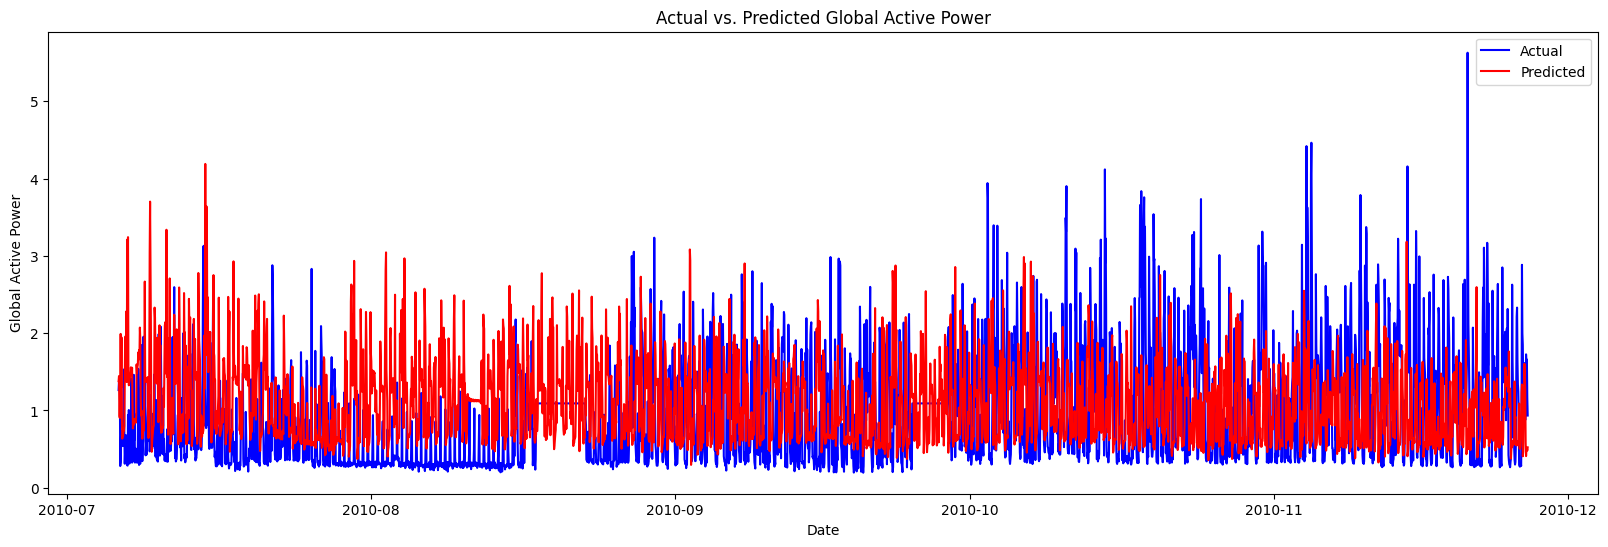

XGBoost Model test data plot of Actual vs Predicted


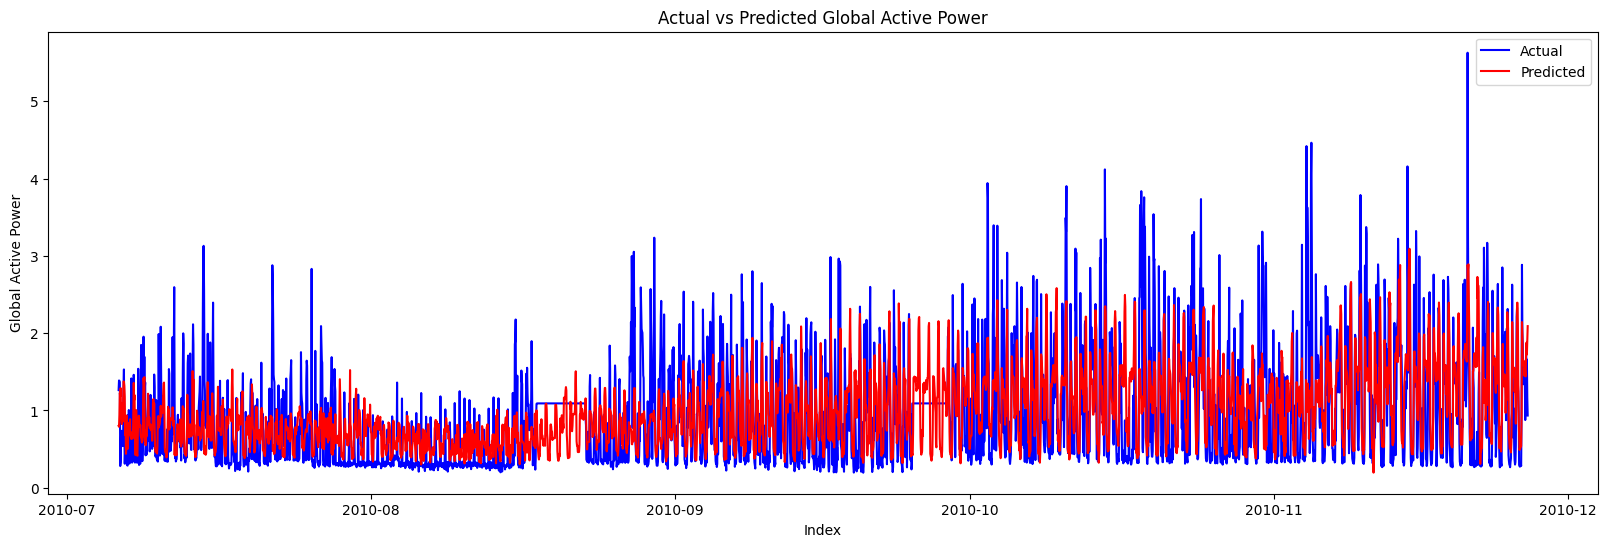

LSTM Model loss plot


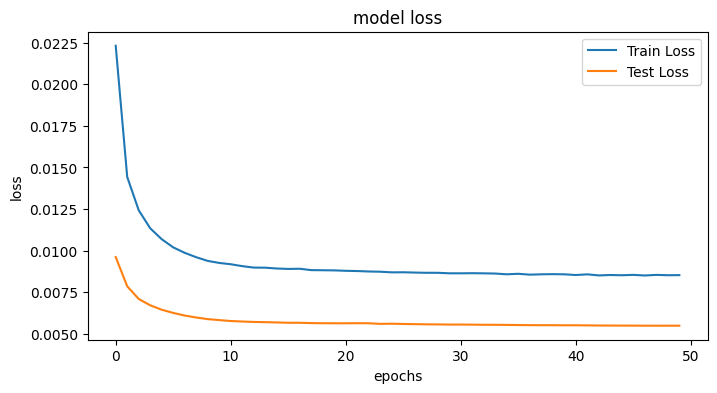

LSTM Model test data plot of Actual vs Predicted


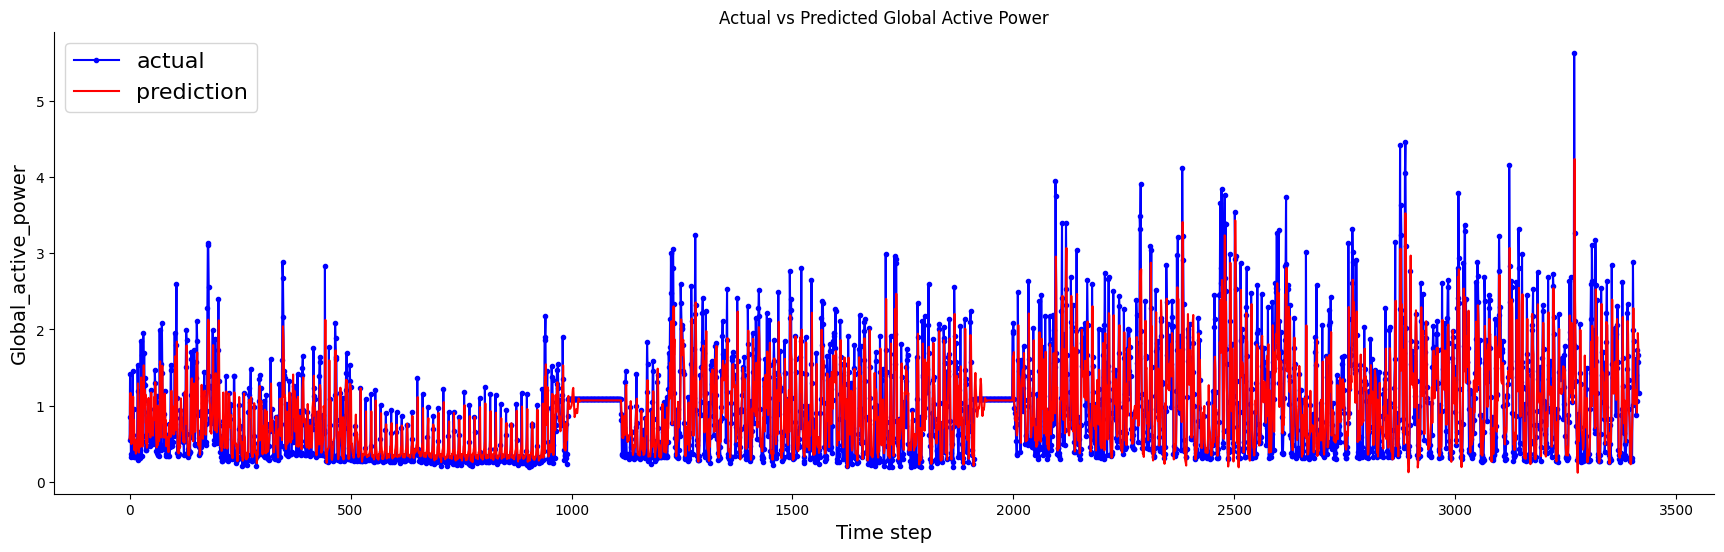

In [67]:
visualization(test_set, sliced_predictions, actual_plot, prediction_plot, history, Y_test, test_predict)

In [ ]:
def visualization(test, sliced_predictions, actual_plot, prediction_plot, history, Y_test, test_predict)